In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Let's generate a theoretical signal t1= 0 #start time
t1 = 0 #start time
t2 = 100 #END TIME
dt=0.1
time_vect = np.arange(t1,t2,dt) #define a time vector
#time_vect

#Model signal or wanted signal,
signal = np.sin(time_vect/2)

#Ad noise to the signal
noise_level = 1 #Noise
bckround_max = 3 #Background leve

#Create a noisy signal with background
noisy_signal = signal + (-(time_vect**2) + t2*time_vect)/(t2**2/4)*bckround_max + noise_level*np.random.rand(len(time_vect))


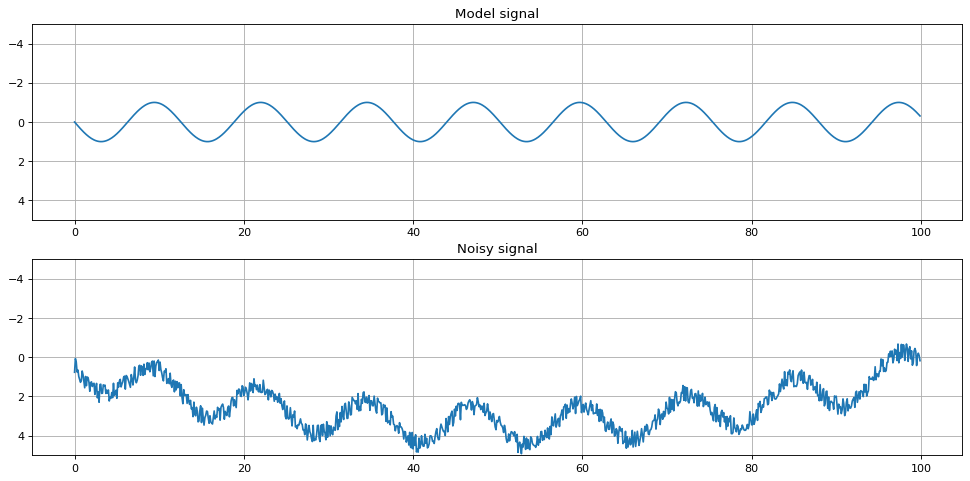

In [15]:
fig = plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.plot(time_vect,signal)
plt.grid()
plt.ylim(5,-5)
plt.title('Model signal')
plt.subplot(2, 1, 2)
plt.plot(time_vect,noisy_signal)
plt.grid()
plt.ylim(5,-5)
plt.title('Noisy signal')
plt.show()

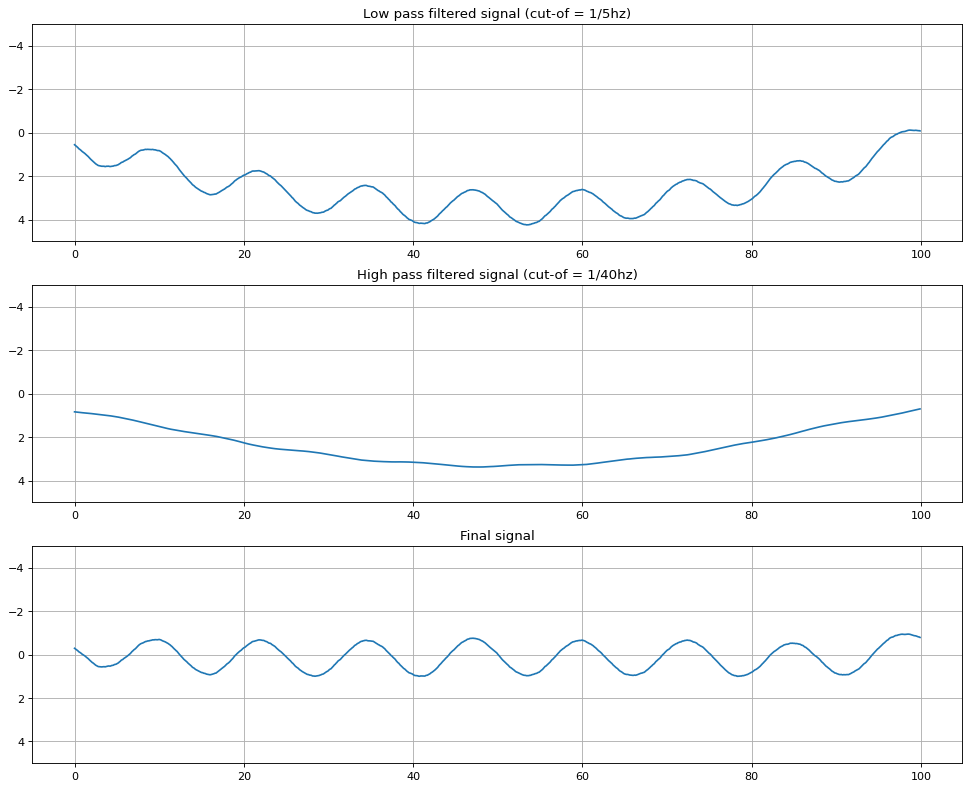

In [18]:
#Method 1: Running mean
#First define how long is the window in running mean
T1= 5
w1 = int(T1/dt)  #number of data points in the first window for low pass filter
T2 = 40
w2 = int(T2/dt)  #number of data points in the second window for high pass filter

#Calculating the running mean (filtering signals)
mean_signal = np.convolve(noisy_signal, np.ones(w1)/w1, mode='same') #averaging over the period of window 1
mean_signal2 = np.convolve(noisy_signal, np.ones(w2)/w2, mode='same') #averaging over the period of window 2
final_signal = mean_signal - mean_signal2

fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3, 1, 1)
plt.plot(time_vect,mean_signal)
plt.grid()
plt.ylim(5,-5)
plt.title('Low pass filtered signal (cut-of = 1/5hz)')
plt.subplot(3, 1, 2)
plt.plot(time_vect,mean_signal2)
plt.grid()
plt.ylim(5,-5)
plt.title('High pass filtered signal (cut-of = 1/40hz)')
plt.subplot(3, 1, 3)
plt.plot(time_vect,final_signal)
plt.grid()
plt.ylim(5,-5)
plt.title('Final signal')

plt.show()

In [29]:
%pip install filtfilt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement filtfilt (from versions: none)
ERROR: No matching distribution found for filtfilt

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    
    return y


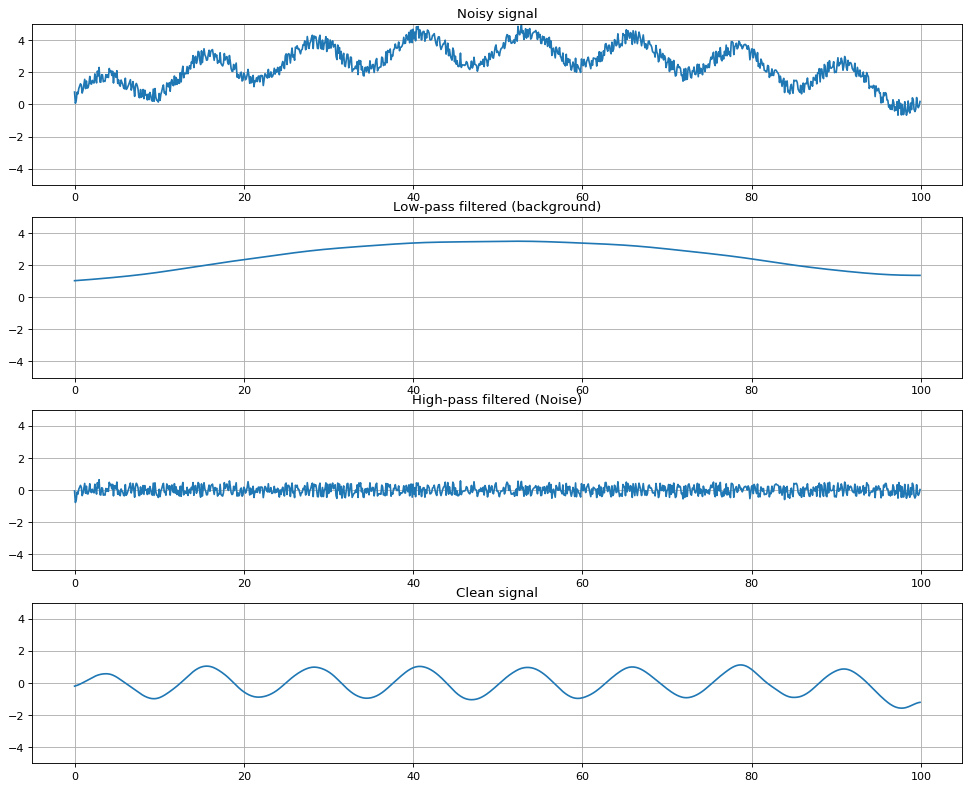

In [34]:
#Method 2: Frequency-based filters
order = 2
fs = 1/dt
nyq = 0.5 * fs 
cutoff_L = 1/40 #Lowpass cut-off
cutoff_H = 1/5 #Highpass cut-of
    
lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
highpass_filtered = butter_highpass_filter(noisy_signal, cutoff_H, fs, nyq, order)
    
clean_signal = noisy_signal - lowpass_filtered - highpass_filtered
    
fig = plt.figure(num=None, figsize= (15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(4,1,1)
plt.plot(time_vect,noisy_signal)
plt.grid()
plt.ylim(-5,5)
plt.title('Noisy signal')
plt.subplot(4,1,2)
plt.plot(time_vect,lowpass_filtered)
plt.title('Low-pass filtered (background)')
plt.grid()
plt.ylim(-5,5)
plt.subplot(4,1,3)
plt.plot(time_vect,highpass_filtered)
plt.title('High-pass filtered (Noise)')
plt.grid()
plt.ylim(-5,5)
plt.subplot(4,1,4)
plt.plot(time_vect,clean_signal)
plt.title('Clean signal')
plt.grid()
plt.ylim(-5,5)
plt.show()

Text(0.5, 1.0, 'Filtered signal')

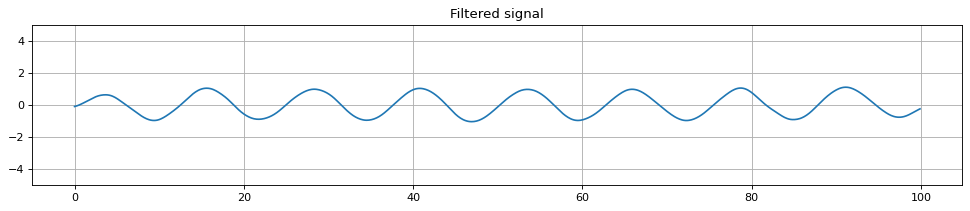

In [35]:
cutoff_H = 1/40 
#Highpass cut-off
cutoff_L = 1/5 #Lowpass cut-of

#After this filtering we'll have only frequencies from 1/40 to 1/5 in the data
lowpass_filtered2 = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #Filter out high frequencies\n",
final_signal2 = butter_highpass_filter(lowpass_filtered2, cutoff_H, fs, nyq, order) #Filter out low low frequencies. \n",

fig = plt.figure(num=None, figsize= (15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(4,1,1)
plt.plot(time_vect,final_signal2)
plt.grid()
plt.ylim(-5,5)
plt.title('Filtered signal')